In [469]:
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [470]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_recall_fscore_support, confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image

In [471]:
df_cancer= pd.read_csv(r"C:\Users\stuar\Documents\College\Data Mining\Assignment\wdbc.data",header=None)
df_cancer.columns= ["ID","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concavepnts_mean","symmetry_mean","fractal_mean","radius_SE","texture_SE","perimeter_SE","area_SE","smoothness_SE","compactness_SE","concavity_SE","concavepts_SE","symmetry_SE","fractal_SE","vradiuse_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave_worst","symmetry_worst","fractal_worst"]

In [472]:
df_cancer=df_cancer.drop("ID",axis=1)
labelencoder_Y=LabelEncoder()
df_cancer['diagnosis'] = labelencoder_Y.fit_transform(df_cancer['diagnosis'].astype(str))
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepnts_mean,symmetry_mean,...,vradiuse_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_worst,symmetry_worst,fractal_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [473]:
#'Diagnosis' is the column that will be predicted
# Diagnosis = M (Malignant) and Diagnosis = B (Benign)
# 1 => M and 0 => B 
df_cancer.iloc[:, 0].unique()

array([1, 0])

In [474]:
print("Dimensions of the Breast Cancer Data Set : {}".format(df_cancer.shape))

Dimensions of the Breast Cancer Data Set : (569, 31)


In [475]:
#No missing or null value
df_cancer.isnull().sum()
df_cancer.isna().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
concavepnts_mean     0
symmetry_mean        0
fractal_mean         0
radius_SE            0
texture_SE           0
perimeter_SE         0
area_SE              0
smoothness_SE        0
compactness_SE       0
concavity_SE         0
concavepts_SE        0
symmetry_SE          0
fractal_SE           0
vradiuse_worst       0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
concave_worst        0
symmetry_worst       0
fractal_worst        0
dtype: int64

### PCA Dimensionality Reduction

### Independent And Dependent Variables 

In [476]:
# independant variables
X = df_cancer.iloc[:, 1:31].values 
# dependant variable
Y = df_cancer.iloc[:, 0].values

In [477]:
df_cancer_new=X.copy()

### Data Standardization

In [478]:
scaler_cancer = StandardScaler()

# Apply transform to set.
df_cancer_new = scaler_cancer.fit(df_cancer_new).transform(df_cancer_new)

In [479]:
pca = PCA(n_components=1)
pca.fit(df_cancer_new)

PCA(n_components=1)

In [480]:
df_cancer_new=pca.transform(df_cancer_new)
df_cancer_new.shape

(569, 1)

### New Dataframe 

In [481]:
df_cancer_new=pd.DataFrame(df_cancer_new)
df_cancer_new.head()

,0
0,9.192837
1,2.387802
2,5.733896
3,7.122953
4,3.935302


In [482]:
# X_base= StandardScaler().fit_transform(X)
# pca = PCA(n_components=1)
# pcomponents= pca.fit(X_base).transform(X_base)
# pDf = pd.DataFrame(data = pcomponents,columns = ['Principal Component 1'])

print("Explained Variance Ratio: \n(PC1)\n" ,pca.explained_variance_ratio_*100)

Explained Variance Ratio: 
(PC1)
 [44.27202561]


### Model using Original Data

In [483]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 0)

In [484]:
# standardscaler = StandardScaler()
# X_train = standardscaler.fit_transform(X_train)
# X_test = standardscaler.transform(X_test)
classifier = DecisionTreeClassifier(criterion='gini', max_depth =2, min_samples_split=5, min_samples_leaf=2)
classifier.fit(X_train,Y_train)
y_pred =classifier.predict(X_test)

In [485]:
print("\nOriginal Data Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("\n")
#Classification report
print(classification_report(Y_test, y_pred))


Original Data Confusion Matrix
[[66  1]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



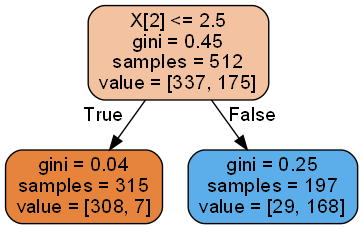

In [486]:
export_graphviz(classifier, out_file='tree_4.dot' ,max_depth=2,
                rounded=True, proportion=False, precision=2, filled=True
               )
!dot -Tpng tree_4.dot -o tree_4.png -Gdpi=100
Image(filename="tree_1.png")

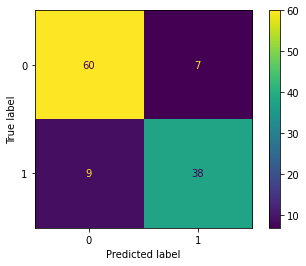

In [487]:
show = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred),display_labels=classifier.classes_)
show.plot()

### Model using First Principal Components 

In [488]:
X_train, X_test, Y_train, Y_test = train_test_split(df_cancer_new,Y,test_size=0.2,random_state=0)

In [489]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth =2, min_samples_split=5, min_samples_leaf=2)
classifier.fit(X_train,Y_train)
Y_pred =classifier.predict(X_test)

In [490]:
print("\nPCA 1 Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))
print("\n")
#Classification report
print(classification_report(Y_test, Y_pred))


PCA 1 Confusion Matrix
[[58  9]
 [ 5 42]]


              precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.82      0.89      0.86        47

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



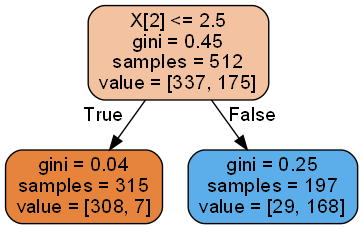

In [491]:
export_graphviz(classifier, out_file='tree_5.dot' ,max_depth=2,
                rounded=True, proportion=False, precision=2, filled=True
               )
!dot -Tpng tree_5.dot -o tree_5.png -Gdpi=100
Image(filename="tree_1.png")

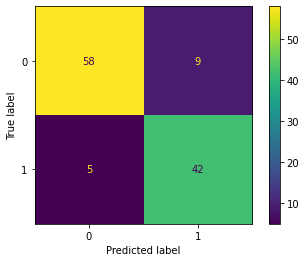

In [492]:
show = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred),display_labels=classifier.classes_)
show.plot()

### Considering 1 as Positive
### Precision = 0.84
### Recall = 0.81
### TP=42
### FN=5
### FP=9 
### TN=58 

### FPR = FP/(FP+TN)=(9/(9+58))
### FPR=0.134
### TPR = TP/(TP+FN)=(42/(110))
### TPR(Recall)= 0.38

### FPR/TPR=0.352

### Model using First and Second Principal Component 

In [493]:
#copy original data
df_cancer_new1=X.copy()
#Apply Standardization
scaler = StandardScaler()
df_cancer_new1=scaler.fit(df_cancer_new1).transform(df_cancer_new1)


In [494]:
pca = PCA(n_components=2)
pca.fit(df_cancer_new1)
df_cancer_new1=pca.transform(df_cancer_new1)

In [495]:
X_train, X_test, Y_train, Y_test = train_test_split(df_cancer_new1,Y,test_size=0.2,random_state=0)

In [496]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth =2, min_samples_split=5, min_samples_leaf=2)
classifier.fit(X_train,Y_train)
Y_pred =classifier.predict(X_test)

In [497]:
print("\nPCA 2 Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))
print("\n")
#Classification report
print(classification_report(Y_test, Y_pred))


PCA 2 Confusion Matrix
[[60  7]
 [ 9 38]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.88        67
           1       0.84      0.81      0.83        47

    accuracy                           0.86       114
   macro avg       0.86      0.85      0.85       114
weighted avg       0.86      0.86      0.86       114



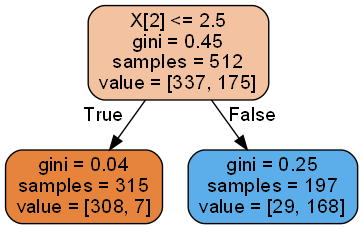

In [498]:
export_graphviz(classifier, out_file='tree_6.dot' ,max_depth=2,
                rounded=True, proportion=False, precision=2, filled=True
               )
!dot -Tpng tree_6.dot -o tree_6.png -Gdpi=100
Image(filename="tree_1.png")

In [499]:
show = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred),display_labels=classifier.classes_)

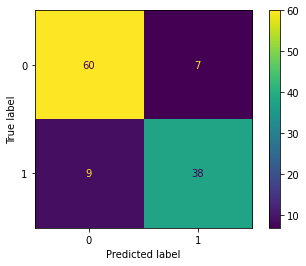

In [500]:
show.plot()

### Considering 1 as Positive
### Precision = 0.84
### Recall = 0.81
### TP=38
### FN=9
### FP=7 
### TN=60 

### FPR = FP/(FP+TN)=(7/(7+60))
### FPR=0.10
### TPR = TP/(TP+FN)=(38/(47))
### TPR(Recall)= 0.81

### FPR/TPR=.123